## Nadaraya-Watson Estimator (one dimensional example)

Import packages for working with numpy arrays and plot

In [149]:
# import numpy / numpy modules
import numpy as np
# import matplotlib (pyplot)
import matplotlib.pyplot as plt 

Define datasets x and y training data.

In [150]:
xTrain = np.array([108,120,84,79,128,126,111,103,122,119])
yTrain = np.array([211,271,121,31,341,401,241,181,301,301])
# find length of xTrain = 10
n=(xTrain.shape[0])
# reshape xTrain to XTrain column vector
XTrain = xTrain.reshape(n,1)

Plot data:

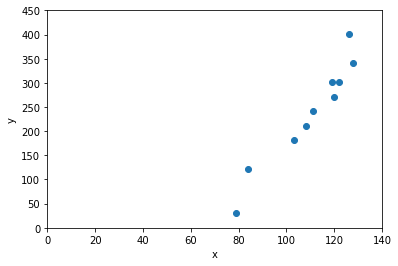

In [151]:
plt.scatter(xTrain, yTrain)
plt.xlim(0,140);
plt.ylim(0,450);
plt.xlabel('x');
plt.ylabel('y');
plt.show()

Kernels measure the similarities of
neighbouring points. A common kernel is the gaussian kernel defined as:
\begin{equation}
K_\sigma(x, x^{(i)}) = \exp \Bigg( -\frac{1}{2} \frac{(x-x^{(i)})^2 }{\sigma^2} \Bigg).
\end{equation}

The Nadaraya-Watson estimator uses a scaled version of the gaussian kernel where all rows sum to 1.
\begin{equation}
\frac{K_\sigma(x,x^{(i)})}{\sum_{l=1}^{N} K_\sigma (x,x^{(l)})}
\end{equation}

This scaled gaussian kernel is calculated below:

In [152]:
# creates a vector which measures the similarility between two vectors
def gauss_kernel_scaled(x, X, s):
    d = np.sum((X-x)**2, axis=1)
    k = np.exp(-0.5/s**2*d)
    if np.sum(k)!=0:     
        return k/np.sum(k) #scale so output vector sums to one.
    else:
        return k

The Nadaraya-Watson Estimator is then:

\begin{equation}
h^{(\sigma)} (x) = \sum_{i=1}^{n} y^{(i)} \frac{K_\sigma(x,x^{(i)})}{\sum_{l=1}^{n} K_\sigma (x,x^{(l)})}
\end{equation}

This is implemented in a for loop, which calculates the estimator for a range of different x values. First a vector of xs is created (xTest) and iterated through. For each x in xTest, the scaled gaussian kernel vector is created (k). The dot product of k and the yTrain data then calculates the Nadaraya-Watson Estimator, which is stored in yTest.

In [153]:
# Creates Nadaraya-Watson estimator for N equally spaced x points from xstart to xend
def NW(xtrain,ytrain,s,xstart,xend,N):
    xTest = np.linspace(xstart,xend, N) #initiliase xTest wtih N equally spaced points from xstart to xend
    xTest = xTest.reshape(N,1) #reshape xTest to column vector
    yTest = np.zeros(N) #initialise yTest output data with N zeros
    for i in range(N):
        k = gauss_kernel_scaled(xTest[i,:], xtrain, s) #creates a scaled gaussian kernel with n entries measuring similarility
        yTest[i] = np.dot(k,yTrain.reshape(10,1))
    return xTest, yTest

Calculate and plot Nadaraya-Watson estimator for $\sigma$ = 1,5,10

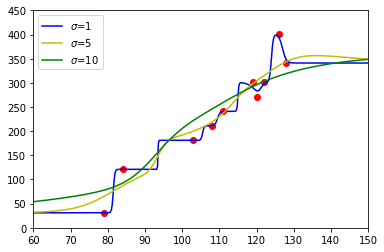

In [154]:
# Calculate Nadaraya-Watson estimator for different sigmas
xNW_s1, yNW_s1 = NW(XTrain,yTrain,1,60,150,400)
xNW_s5, yNW_s5 = NW(XTrain,yTrain,5,60,150,400)
xNW_s10, yNW_s10 = NW(XTrain,yTrain,10,60,150,400)

# Create chart with original points and Nadaraya-Watson estimators
plt.scatter(xTrain, yTrain, color='r', marker='o')
plt.plot(xNW_s1, yNW_s1, 'b-', label='$\sigma$=1')
plt.plot(xNW_s5, yNW_s5, 'y-', label='$\sigma$=5')
plt.plot(xNW_s10, yNW_s10, 'g-', label='$\sigma$=10')
plt.xlim(60,150);
plt.ylim(0,450);
plt.legend();
plt.show()